In [1]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import h5py
import numpy as np # linear algebra library
import cv2 # for image processing methods 
import matplotlib.pyplot as plt # visualisation tool
from matplotlib import gridspec

import pandas as pd
import os # for managing file paths and os operations
import sys # system specefic calls
import time 
import pdb # debug

from sklearn.metrics import confusion_matrix, classification_report

import torch # Deep learning framework
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl

import torchvision # for creating datasets, and pretrained models
from torch.utils.tensorboard import SummaryWriter # visualise the learning
from  torch.utils.data import Dataset, DataLoader # parellel dataset loader
from torchvision import models, datasets, transforms, utils

from torchsummary import summary

import copy # to create deep copies
import pickle as pk # for serialization

In [2]:
# import matplotlib
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy import ndimage
# from scipy.spatial.distance import euclidean
# from scipy.optimize import linear_sum_assignment
# import pandas as pd
# from pdb import set_trace as bp
# import os
# import iocsv

# def computeAssignment(list_detections,list_gt,allowedDistance,save_disagreement=False):
#     #the assignment is based on the hungarian algorithm
#     #https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linear_sum_assignment.html
#     #https://en.wikipedia.org/wiki/Hungarian_algorithm
    
#     #build cost matrix
#     #rows: GT
#     #columns: detections
#     cost_matrix = np.zeros([len(list_gt),len(list_detections)])
#     for i, pointR1 in enumerate(list_gt):
#         for j, pointR2 in enumerate(list_detections): 
#             cost_matrix[i,j] = euclidean(pointR1,pointR2)
            
#     #perform assignment        
#     row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
#     #threshold points too far
#     row_ind_thresholded = []
#     col_ind_thresholded = []
#     for i in range(len(row_ind)):
#         if cost_matrix[row_ind[i],col_ind[i]] < allowedDistance:
#             row_ind_thresholded.append(row_ind[i])
#             col_ind_thresholded.append(col_ind[i])
    
#     #save coord FP and FN
#     if save_disagreement:
#         #just copy the lists and remove correct detections
#         list_FN = list(list_gt) #list() to copy
#         list_FP = list(list_detections)
#         for i in range(len(row_ind_thresholded)):
#             list_FN.remove(list_gt[row_ind_thresholded[i]])
#             list_FP.remove(list_detections[col_ind_thresholded[i]])
                          
#     #compute stats
#     P = len(list_gt)
#     TP = len(row_ind_thresholded)
#     FP = len(list_detections) - TP
    
#     if save_disagreement:
#         return P,TP,FP,list_FP,list_FN
#     else:
#         return P,TP,FP  
        
# def saveCoordFNFP(list_ids,list_detections,list_gt,allowedDistance,index_pred_thresh, save_path):
#     #extract list predicted threshold
#     list_detections_thresh = []
#     for i in range(len(list_ids)):
#         list_detections_thresh.append(list_detections[i][-index_pred_thresh])
            
#     if not os.path.exists(os.path.join(save_path,'FPFN')):
#         os.mkdir(os.path.join(save_path,'FPFN'))
        
#     FNFPallimages = pd.DataFrame(index=list_ids,columns=['FP','FN','FP+FN'])
        
#     #iterate over scans
#     for image_nbr, gt in enumerate(list_gt):

#         image_id = list_ids[image_nbr]
#         if len(gt) > 0:  #check that ground truth contains at least one annotation
#             if len(list_detections_thresh[image_nbr]) > 0: #if there are detections
#                 #compute P, TP, FP per image
#                 _,_,_,list_FP,list_FN = computeAssignment(list_detections_thresh[image_nbr],gt,allowedDistance,save_disagreement=True)                
#             else:
#                 list_FP = []
#                 list_FN = gt
                    
#         elif len(gt) == 0 and len(list_detections_thresh[image_nbr]) > 0: #if no annotations but detections
#             list_FP = list_detections_thresh[image_nbr]
#             list_FN = []
            
#         elif len(gt) == 0 and len(list_detections_thresh[image_nbr]) == 0: #if no annotation and no detection
#             list_FP = []
#             list_FN = []
            
#         #nbr FP FN
#         FNFPallimages.loc[image_id] = pd.Series({'FP':len(list_FP),'FN':len(list_FN),'FP+FN':len(list_FP)+len(list_FN)})
#         nbr_FPFN = [['FP',len(list_FP)],['FN',len(list_FN)]]
        
#         #create a single list
# #        list_FPFN = []
# #        list_FPFN.append(['coord','FP'])
# #        for point in list_FP:
# #            list_FPFN.append([point,1])
# #        for point in list_FN:
# #            list_FPFN.append([point,0]) 
            
#         list_FPFN = pd.DataFrame(columns=['x','y','z','FP'])
#         for point in list_FP:
#             list_FPFN = list_FPFN.append({'x':point[0],'y':point[1],'z':point[2],'FP':1},ignore_index=True)
#         for point in list_FN:
#             list_FPFN = list_FPFN.append({'x':point[0],'y':point[1],'z':point[2],'FP':0},ignore_index=True)
        
                        
#         #save results
#         if not os.path.exists(os.path.join(save_path,'FPFN',image_id)):
#             os.mkdir(os.path.join(save_path,'FPFN',image_id))    
#         iocsv.saveListCsvMultiCol(list_FN,os.path.join(save_path,'FPFN',image_id,'list_FN.csv'))
#         iocsv.saveListCsvMultiCol(list_FP,os.path.join(save_path,'FPFN',image_id,'list_FP.csv'))
# #        iocsv.saveListCsvMultiCol(list_FPFN,os.path.join(save_path,'FPFN',image_id,'list_FPFN.csv'))
#         iocsv.saveListCsvMultiCol(nbr_FPFN,os.path.join(save_path,'FPFN',image_id,'FPFN.csv'))
#         list_FPFN.to_csv(os.path.join(save_path,'FPFN',image_id,'list_FPFN.csv'))
#         FNFPallimages = FNFPallimages.sort_values(by='FP+FN',ascending=False)
#         FNFPallimages.to_csv(os.path.join(save_path,'FPFN','FNFPallimages.csv'))

# def computeFROCfromListsMatrix(list_ids,list_detections,list_gt,allowedDistance):
#     #list_detection: first dimlension: number of images 
#     #list_gt: first dimlension: number of images
    
#     #get maximum number of detection per image across the dataset
#     max_nbr_detections = 0
#     for detections in list_detections:
#         if len(detections) > max_nbr_detections:
#             max_nbr_detections = len(detections)
    
#     sensitivity_matrix = pd.DataFrame(columns=list_ids)
#     FP_matrix = pd.DataFrame(columns=list_ids)

#     #iterate over 'thresholds'
#     for i in range(1,max_nbr_detections):
#         sensitivity_per_image = {}
#         FP_per_image = {}
#         #iterate over scans
#         for image_nbr, gt in enumerate(list_gt):
#             image_id = list_ids[image_nbr]
#             if len(gt) > 0:  #check that ground truth contains at least one annotation
#                 if i <= len(list_detections[image_nbr]): #if there are detections
#                     #compute P, TP, FP per image
#                     detections = list_detections[image_nbr][-i]
#                     P,TP,FP = computeAssignment(detections,gt,allowedDistance)                
#                 else:
#                     P = len(gt)
#                     TP,FP = 0,0
                
#                 #append results to list
#                 FP_per_image[image_id] = FP                      
#                 sensitivity_per_image[image_id] = TP*1./P
            
#             elif len(gt) == 0 and i <= len(list_detections[image_nbr]): #if no annotations but detections
#                 FP = len(list_detections[image_nbr][-i])
#                 FP_per_image[image_id] = FP 
#                 sensitivity_per_image[image_id] = None               
         
#         sensitivity_matrix = sensitivity_matrix.append(sensitivity_per_image,ignore_index=True)
#         FP_matrix = FP_matrix.append(FP_per_image,ignore_index=True)
            
#     return sensitivity_matrix.transpose(), FP_matrix.transpose()   

# def computeFROCfromLists(list_detections,list_gt,allowedDistance):
#     #get maximum number of detection per image across the dataset
#     max_nbr_detections = 0
#     for detections in list_detections:
#         if len(detections) > max_nbr_detections:
#             max_nbr_detections = len(detections)
    
#     sensitivity_list = []
#     FPavg_list = []
#     sensitivity_list_std = []
#     FPavg_list_std = []

#     for i in range(max_nbr_detections):
#         sensitivity_list_per_image = []
#         FP_list_per_image = []
#         for image_nbr, gt in enumerate(list_gt):
#             if len(gt) > 0:  #check that ground truth contains at least one annotation
#                 if i <= len(list_detections[image_nbr]): #if there are detections
#                     #compute P, TP, FP per image
#                     detections = list_detections[image_nbr][-i]
#                     P,TP,FP = computeAssignment(detections,gt,allowedDistance)                
#                 else:
#                     P = len(gt)
#                     TP,FP = 0,0
                
#                 #append results to list
#                 FP_list_per_image.append(FP)                      
#                 sensitivity_list_per_image.append(TP*1./P)
            
#             elif len(gt) == 0 and i <= len(list_detections[image_nbr]): #if no annotations but detections
#                 FP = len(list_detections[image_nbr][-i])
#                 FP_list_per_image.append(FP) 
#                 sensitivity_list_per_image.append(None)               
            
#         #average sensitivity and FP over the proba map, for a given threshold
#         sensitivity_list.append(np.mean(sensitivity_list_per_image))
#         FPavg_list.append(np.mean(FP_list_per_image))
#         sensitivity_list_std.append(np.std(sensitivity_list_per_image))
#         FPavg_list_std.append(np.std(FP_list_per_image))
            
#     return sensitivity_list, FPavg_list, sensitivity_list_std, FPavg_list_std      

# def computeConfMatElements(thresholded_proba_map, ground_truth, allowedDistance):
    
#     if allowedDistance == 0 and type(ground_truth) == np.ndarray:
#         P = np.count_nonzero(ground_truth)
#         TP = np.count_nonzero(thresholded_proba_map*ground_truth)
#         FP = np.count_nonzero(thresholded_proba_map - (thresholded_proba_map*ground_truth))    
#     else:
    
#         #reformat ground truth to a list  
#         if type(ground_truth) == np.ndarray:
#             #convert ground truth binary map to list of coordinates
#             labels, num_features = ndimage.label(ground_truth)
#             list_gt = ndimage.measurements.center_of_mass(ground_truth, labels, range(1,num_features+1))   
#         elif type(ground_truth) == list:        
#             list_gt = ground_truth        
#         else:
#             raise ValueError('ground_truth should be either of type list or ndarray and is of type ' + str(type(ground_truth)))
        
#         #reformat thresholded_proba_map to a list
#         labels, num_features = ndimage.label(thresholded_proba_map)
#         list_proba_map = ndimage.measurements.center_of_mass(thresholded_proba_map, labels, range(1,num_features+1)) 
         
#         #compute P, TP and FP  
#         P,TP,FP = computeAssignment(list_proba_map,list_gt,allowedDistance)
                                 
#     return P,TP,FP
        
# def computeFROC(proba_map, ground_truth, allowedDistance, nbr_of_thresholds=40, range_threshold=None):
#     #INPUTS
#     #proba_map : numpy array of dimension [number of image, xdim, ydim,...], values preferably in [0,1]
#     #ground_truth: numpy array of dimension [number of image, xdim, ydim,...], values in {0,1}; or list of coordinates
#     #allowedDistance: Integer. euclidian distance distance in pixels to consider a detection as valid (anisotropy not considered in the implementation)  
#     #nbr_of_thresholds: Interger. number of thresholds to compute to plot the FROC
#     #range_threshold: list of 2 floats. Begining and end of the range of thresholds with which to plot the FROC  
#     #OUTPUTS
#     #sensitivity_list_treshold: list of average sensitivy over the set of images for increasing thresholds
#     #FPavg_list_treshold: list of average FP over the set of images for increasing thresholds
#     #threshold_list: list of thresholds
            
#     #rescale ground truth and proba map between 0 and 1
#     proba_map = proba_map.astype(np.float32)
#     proba_map = (proba_map - np.min(proba_map)) / (np.max(proba_map) - np.min(proba_map))
#     if type(ground_truth) == np.ndarray:
#         #verify that proba_map and ground_truth have the same shape
#         if proba_map.shape != ground_truth.shape:
#             raise ValueError('Error. Proba map and ground truth have different shapes.')
        
#         ground_truth = ground_truth.astype(np.float32)    
#         ground_truth = (ground_truth - np.min(ground_truth)) / (np.max(ground_truth) - np.min(ground_truth))
    
#     #define the thresholds
#     if range_threshold == None:
#         threshold_list = (np.linspace(np.min(proba_map),np.max(proba_map),nbr_of_thresholds)).tolist()
#     else:
#         threshold_list = (np.linspace(range_threshold[0],range_threshold[1],nbr_of_thresholds)).tolist()
    
#     sensitivity_list_treshold = []
#     FPavg_list_treshold = []
#     #loop over thresholds
#     for threshold in threshold_list:
#         sensitivity_list_proba_map = []
#         FP_list_proba_map = []
#         #loop over proba map
#         for i in range(len(proba_map)):
                       
#             #threshold the proba map
#             thresholded_proba_map = np.zeros(np.shape(proba_map[i]))
#             thresholded_proba_map[proba_map[i] >= threshold] = 1
            
#             #save proba maps
# #            imageio.imwrite('thresholded_proba_map_'+str(threshold)+'.png', thresholded_proba_map)                   
                   
#             #compute P, TP, and FP for this threshold and this proba map
#             P,TP,FP = computeConfMatElements(thresholded_proba_map, ground_truth[i], allowedDistance)       
            
#             #append results to list
#             FP_list_proba_map.append(FP)
#             #check that ground truth contains at least one positive
#             if (type(ground_truth) == np.ndarray and np.nonzero(ground_truth) > 0) or (type(ground_truth) == list and len(ground_truth) > 0):
#                 sensitivity_list_proba_map.append(TP*1./P)
            
        
#         #average sensitivity and FP over the proba map, for a given threshold
#         sensitivity_list_treshold.append(np.mean(sensitivity_list_proba_map))
#         FPavg_list_treshold.append(np.mean(FP_list_proba_map))    
        
#     return sensitivity_list_treshold, FPavg_list_treshold, threshold_list

# def plotFROC(x,y,save_path,threshold_list=None):
#     plt.figure()
#     plt.plot(x,y, 'o-') 
#     plt.xlabel('FPavg')
#     plt.ylabel('Sensitivity')
    
#     #annotate thresholds
#     if threshold_list != None:
#         #round thresholds
#         threshold_list = [ '%.2f' % elem for elem in threshold_list ]            
#         xy_buffer = None
#         for i, xy in enumerate(zip(x, y)):
#             if xy != xy_buffer:                                    
#                 plt.annotate(str(threshold_list[i]), xy=xy, textcoords='data')
#                 xy_buffer = xy
    
#     plt.show()

In [3]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from pl_bolts.callbacks import TrainingDataMonitor
from pytorch_lightning.callbacks import LearningRateMonitor

lr_monitor = LearningRateMonitor(logging_interval='step')

early_stopping_callback = EarlyStopping(monitor='train_loss')

checkpoint_callback = ModelCheckpoint(
   monitor='train_loss',
   dirpath='checkpoints',
   save_top_k=3,
   filename='chowder_{epoch:02d}-val_loss{valid_loss:.4f}',
   auto_insert_metric_name=False
)

datamonitor = TrainingDataMonitor()

callbacks=[lr_monitor, checkpoint_callback]

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:446: UserWarning: Checkpoint directory checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


In [41]:
%load_ext autoreload
%autoreload 2
from data import CamelyonDatasetMIL
from model import ChowderNT


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# data = CamelyonDatasetMIL(subset=0)

In [5]:
# train_dataset = CamelyonDatasetMIL(datasetfilename="training", labelsfilename="train")
# data[0]
# s = train_dataset.metadata.groupby("wsi")["tumor_patch"].sum()
# n, p = (s>0).value_counts()
# weight = p/n


train_dataloader = torch.utils.data.DataLoader(CamelyonDatasetMIL(root_dir="encoded_data_resnet18/", subset=0),
                                           batch_size=1, shuffle=True, num_workers=4)

validation_dataloader = torch.utils.data.DataLoader(CamelyonDatasetMIL(root_dir="encoded_data_resnet18/",subset=1),batch_size=1,
                                                    shuffle=False, num_workers=4)
                                               
test_dataloader = torch.utils.data.DataLoader(CamelyonDatasetMIL(root_dir="encoded_data_imagenet/",subset=2),
                                           batch_size=1, shuffle=False, num_workers=4)

100%|███████████████████████████████████████████| 27/27 [00:11<00:00,  2.25it/s]


In [6]:
model = ChowderNT(embd_size=512, loss_weight=torch.tensor(0.3))
logger = TensorBoardLogger(os.path.abspath("../lightning_logs"), log_graph=True, default_hp_metric=False, name="CHOWDER")
trainer = pl.Trainer(gpus=1, max_epochs=100, auto_lr_find=True, accumulate_grad_batches=10, callbacks=callbacks, logger=logger)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [46]:
#lr_finder = trainer.tuner.lr_find(model)
#fig = lr_finder.plot(suggest=True)

In [7]:
trainer.fit(model, train_dataloaders=train_dataloader, 
            val_dataloaders=validation_dataloader)
trainer.test(model, dataloaders=test_dataloader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.8/dist-packages/torch/_jit_internal.py:651: LightningDeprecationWarning: The `LightningModule.datamodule` property is deprecated in v1.3 and will be removed in v1.5. Access the datamodule through using `self.trainer.datamodule` instead.
  if hasattr(mod, name):
/usr/local/lib/python3.8/dist-packages/torch/_jit_internal.py:651: LightningDeprecationWarning: The `LightningModule.loaded_optimizer_states_dict` property is deprecated in v1.4 and will be removed in v1.6.
  if hasattr(mod, name):

  | Name      | Type              | Params | In sizes       | Out sizes   
--------------------------------------------------------------------------------
0 | embedding | Conv1d            | 513    | [1, 512, 1300] | [1, 1, 1300]
1 | criterion | BCEWithLogitsLoss | 0      | ?              | ?           
2 | mlp       | Sequential        | 24.4 K | [1, 20]        | [1, 1]      
-----------------------------------------------------------

Validation sanity check: 0it [00:00, ?it/s]

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

RuntimeError: Given groups=1, weight of size [1, 512, 1], expected input[1, 2048, 4480] to have 512 channels, but got 2048 channels instead

In [8]:
model = model.cpu()
model = model.eval()

In [17]:
y = []
yhat = []

for img, label, _ in validation_dataloader:
    yhat.append(torch.sigmoid(model(img)).item())
    y.append(int(label.item()))

y, yhat = np.array(y), np.array(yhat)


In [18]:
# (dataset.Y[8])

In [19]:
from sklearn import metrics


In [20]:
yhat

array([9.99983549e-01, 9.99201000e-01, 3.52171063e-02, 1.28463820e-01,
       9.99989390e-01, 2.08796468e-04, 9.99986291e-01, 8.24203908e-01,
       9.96687170e-03, 5.88705821e-04, 3.41658920e-01, 5.19808412e-01,
       6.40632294e-04, 3.93673107e-02, 9.97121990e-01, 2.08582412e-02,
       9.61152017e-01, 4.52879758e-04, 9.99988794e-01, 9.90116179e-01,
       3.12362885e-04, 4.44877148e-02, 3.34761897e-03, 6.31056959e-04,
       3.32782220e-04, 9.99994516e-01, 8.34360078e-04])

In [21]:
metrics.accuracy_score(y, yhat>0.5)

0.9259259259259259

[[0.51851852 0.        ]
 [0.07407407 0.40740741]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.85      0.92        13

    accuracy                           0.93        27
   macro avg       0.94      0.92      0.93        27
weighted avg       0.94      0.93      0.93        27



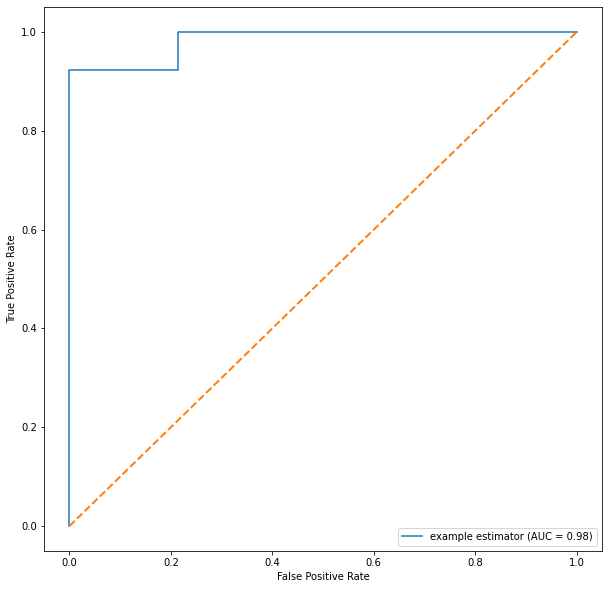

In [22]:
cm = metrics.confusion_matrix(y, yhat>0.5)
print(cm/cm.sum())
print(metrics.classification_report(y, yhat>0.5))


fpr, tpr, thresholds = metrics.roc_curve(y, yhat)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()

display.plot(ax) 

plt.plot([0, 1], [0, 1], '--', linewidth=2)
plt.show()

In [25]:
!pip install scikit-image seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.2 MB 33.0 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 130.6 MB/s eta 0:00:01
     |████████████████████████████████| 171 kB 146.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 168.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 107.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 153.2 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [57]:
y.sum(), (yhat>0.5).sum()

(11, 10)

In [42]:
train_dataloader = torch.utils.data.DataLoader(CamelyonDatasetMIL(root_dir="encoded_data_resnet18/", subset=0),
                                           batch_size=1, shuffle=True, num_workers=4)

In [132]:
validation_dataloader = torch.utils.data.DataLoader(CamelyonDatasetMIL(root_dir="encoded_data_resnet18/", subset=1),
                                           batch_size=1, shuffle=True, num_workers=4)


100%|███████████████████████████████████████████| 27/27 [00:08<00:00,  3.08it/s]


In [123]:
from sklearn.neighbors import KernelDensity
from matplotlib.colors import LinearSegmentedColormap

def plotMap(GT, labels, coords):
    """
    """
    
    coords = (coords - coords.min(0))/(coords.ptp(0))
    
    
    
    coords_labels = coords[labels == 1, :]
    coords_gt = coords[GT == 1, :]


    kde_labels = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(coords_labels)
    kde_gt = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(coords_gt)

    # Regular grid to evaluate kde upon
    n_grid_points = 128
    xmin, ymin = coords.min(axis=0)
    xmax, ymax = coords.max(axis=0)

    xx = np.linspace(xmin - 0.5, xmax + 0.5, n_grid_points)
    yy = np.linspace(ymin - 0.5, ymax + 0.5, n_grid_points)

    xg, yg = np.meshgrid(xx, yy)
    grid_coords = np.c_[xg.ravel(), yg.ravel()]

    zz_labels = kde_labels.score_samples(grid_coords) # Evaluate density on grid points
    zz_labels = zz_labels.reshape(*xg.shape)

    zz_gt = kde_gt.score_samples(grid_coords) # Evaluate density on grid points
    zz_gt = zz_gt.reshape(*xg.shape)

    ncolors = 256
    color_array = plt.get_cmap('jet')(range(ncolors))

    # change alpha values
    color_array[:,-1] = np.linspace(1.0,0.0,ncolors)
    map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)
    
    fig = plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.title("Ground Truth")
    plt.scatter(coords[:, 0], coords[:, 1], alpha=1, s=2)
    plt.contourf(xg, yg, np.exp(zz_gt), cmap=map_object, alpha=0.4)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.subplot(122)
    plt.title("Predicted")
    plt.scatter(coords[:, 0], coords[:, 1], alpha=1, s=2)
    plt.contourf(xg, yg, np.exp(zz_labels), cmap=map_object, alpha=0.4)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()  


In [100]:
# for idx in range(len(dataset)):
#     with torch.no_grad():
#         if y[idx] == 1:
#             labels = local_scores.reshape(-1)           
#             dataset.plotMap(idx, labels)

In [101]:
# computeFROC(local_scores, local_labels, allowedDistance, nbr_of_thresholds=40, range_threshold=None)
# plotFROC(x,y,save_path,threshold_list=None):

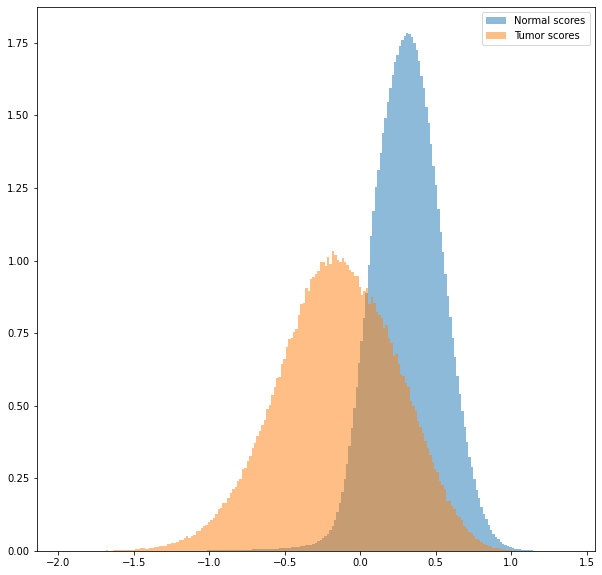

In [128]:
colors = np.array(['gray', 'red'])
bins = 200


tumor_scores = []
normal_scores = []

for i in range(1, len(local_labels)):
    
    sorted_idx = np.argsort(local_scores[i])
    local_labels_sorted = local_labels[i][sorted_idx] 
    tumor = local_labels[i].sum()!=0
    
    normal_scores = np.concatenate((normal_scores, local_scores[i][np.bitwise_not(local_labels[i])]) )
    
    if(not tumor):
        continue
    
    tumor_scores = np.concatenate((tumor_scores, local_scores[i][local_labels[i]]))
    
#     plt.figure(figsize=(20, 7))
#     #plt.hist(local_scores[i], bins=100, density=True, color=colors[local_labels[i]*1])
#     hist, bin_edges = np.histogram(local_scores[i], bins=bins, density=True)
#     bin_step = len(local_scores[i])//bins
    
#     binned_colors = []
#     for j in range(bins):
#         idx = ((local_labels_sorted[bin_step*j:j+bin_step + bin_step].sum())*1.0 >= 1)*1
#         binned_colors.append(colors[idx])
    
    

#     plt.bar(np.arange(bins), hist, color=binned_colors)
#     plt.xticks(np.arange(bins), bin_edges[:-1],rotation=45)
#     #plt.hist(local_scores[i], bins=500)
#     plt.title(tumor, fontsize='large', fontweight='bold')
#     plt.yscale('log')
#     plt.show()
    
plt.figure(figsize=(10, 10))

plt.hist(normal_scores, bins=bins, density=True, alpha=0.5, label="Normal scores")
plt.hist(tumor_scores, bins=bins, density=True, alpha=0.5, label="Tumor scores")
plt.legend()
plt.show()

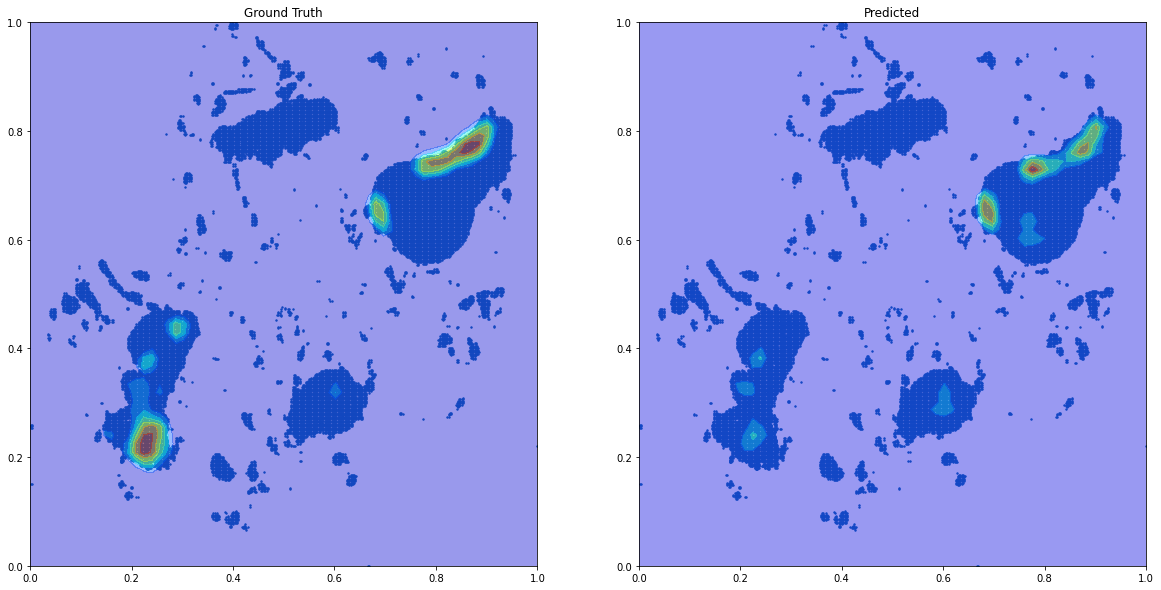

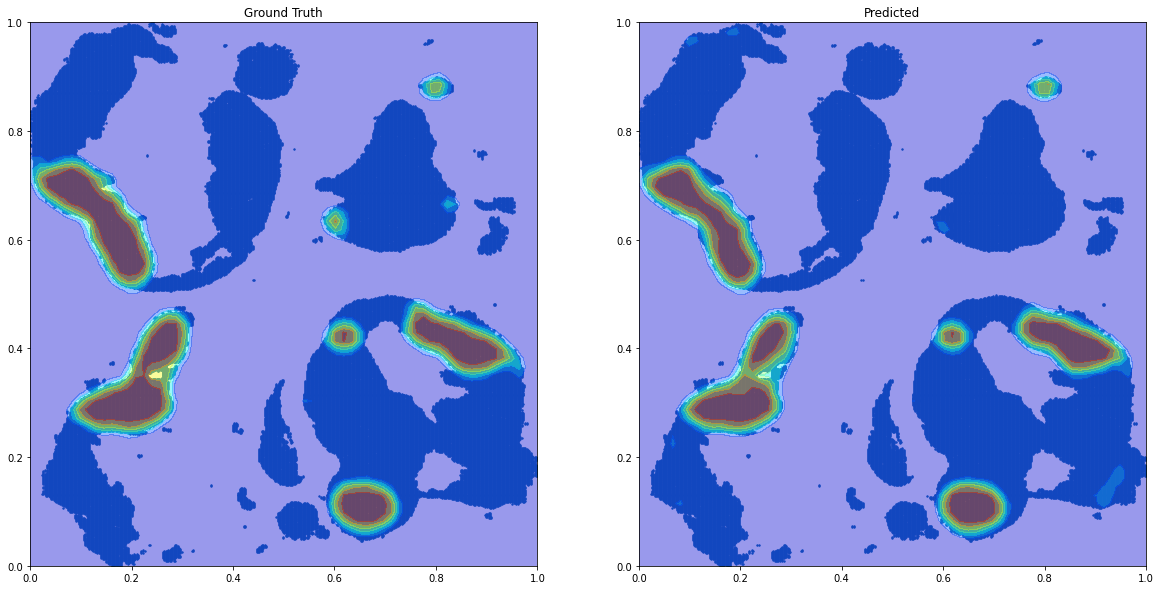

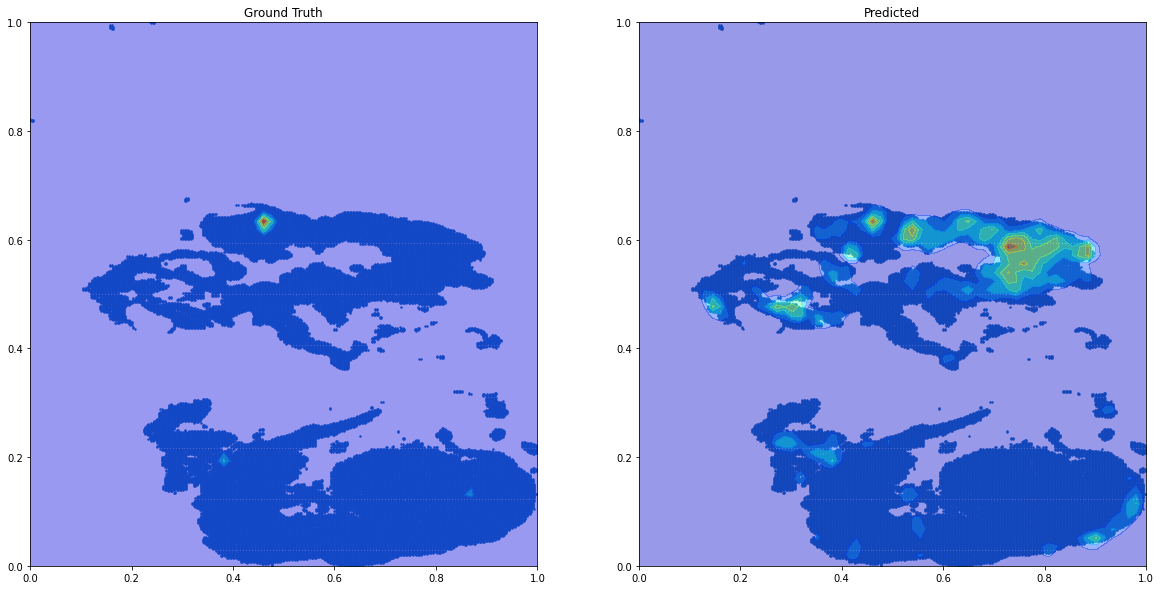

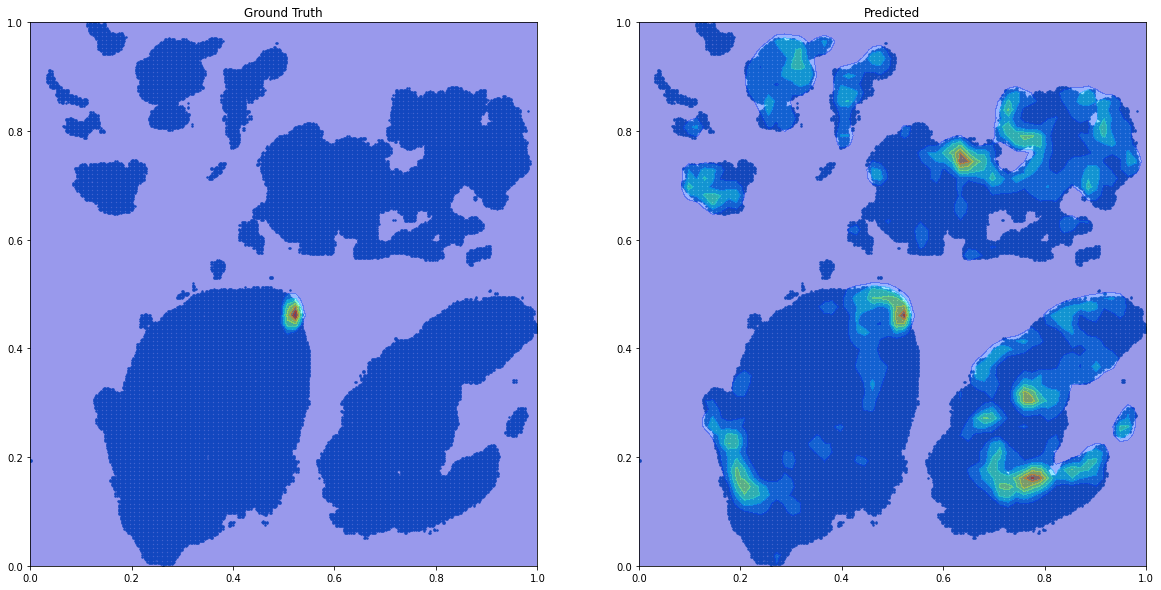

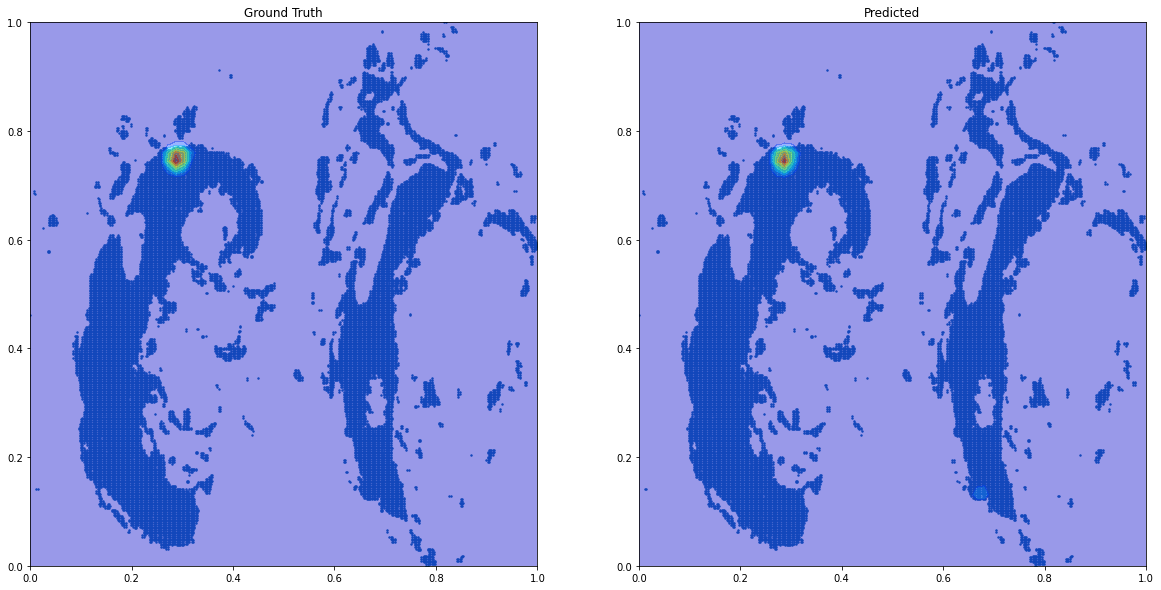

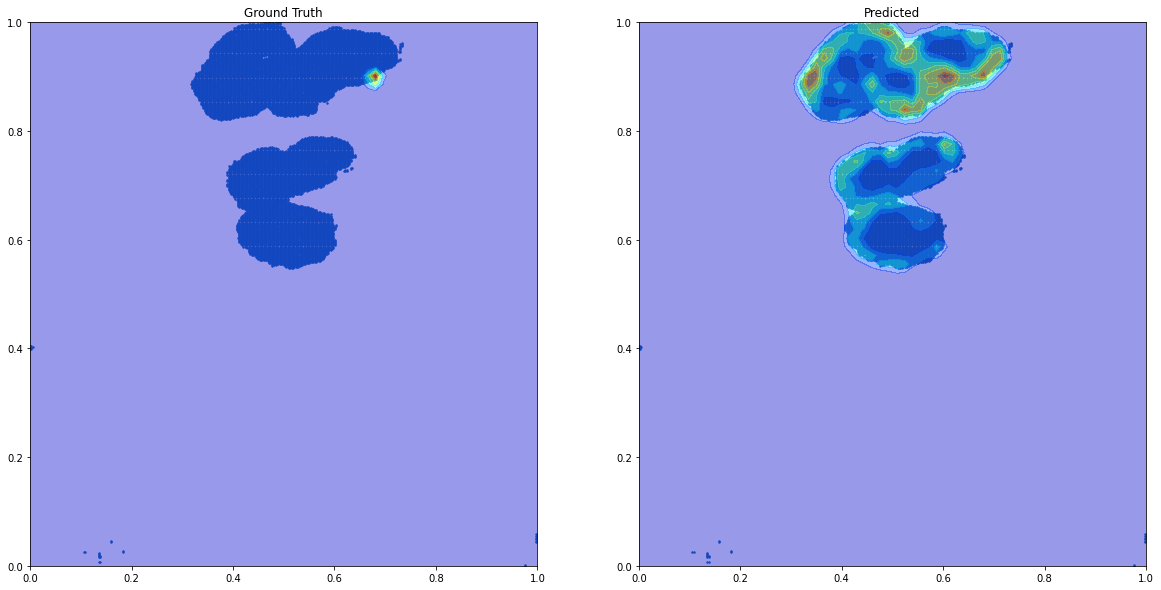

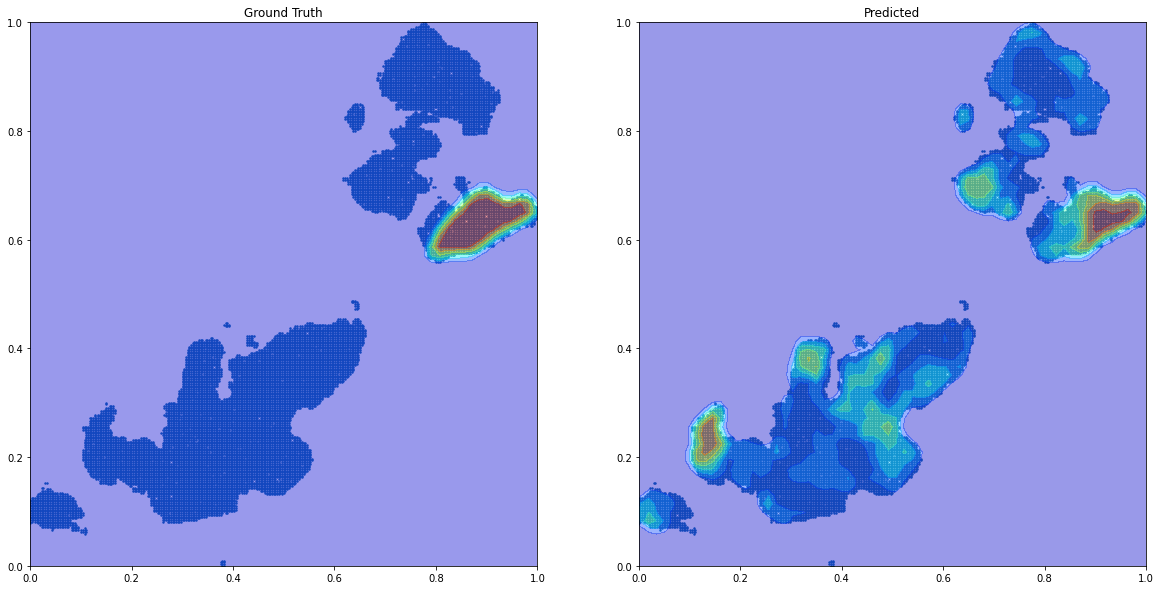

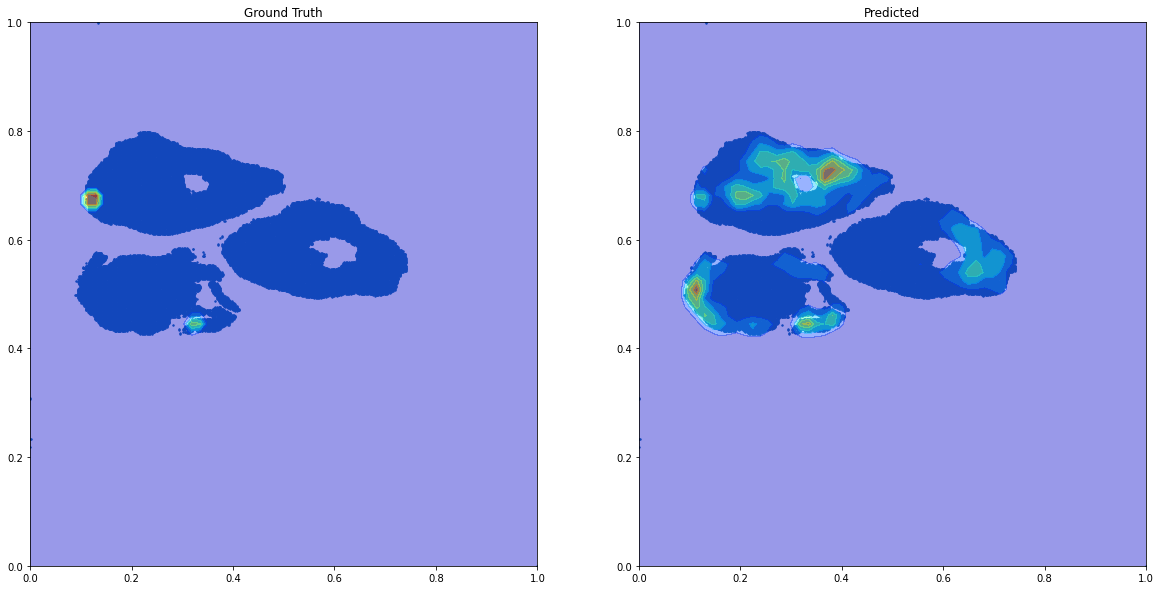

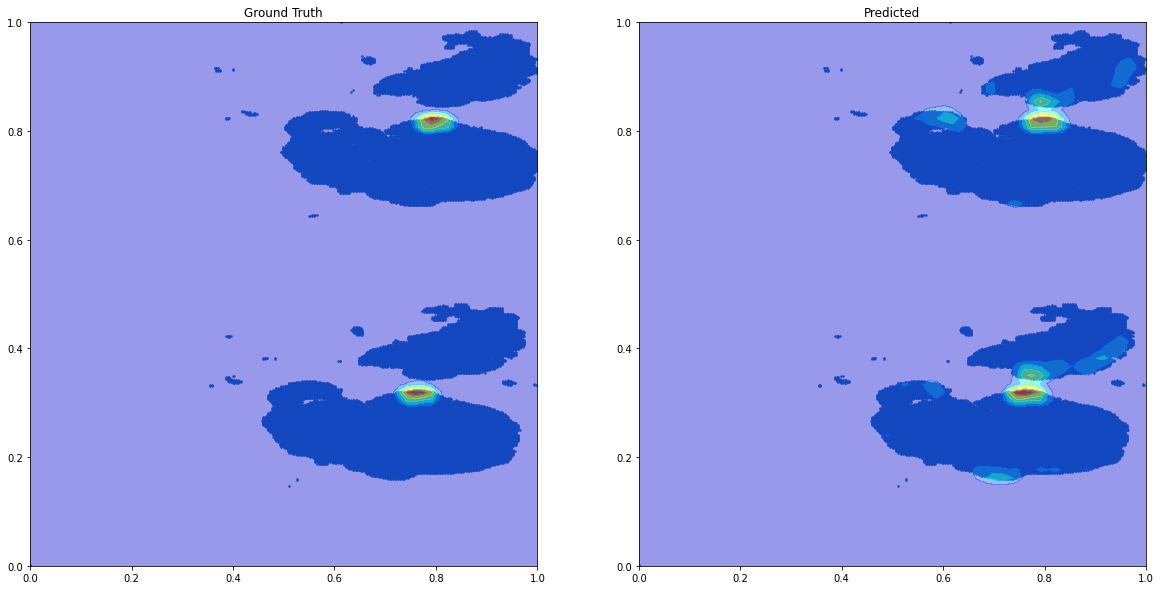

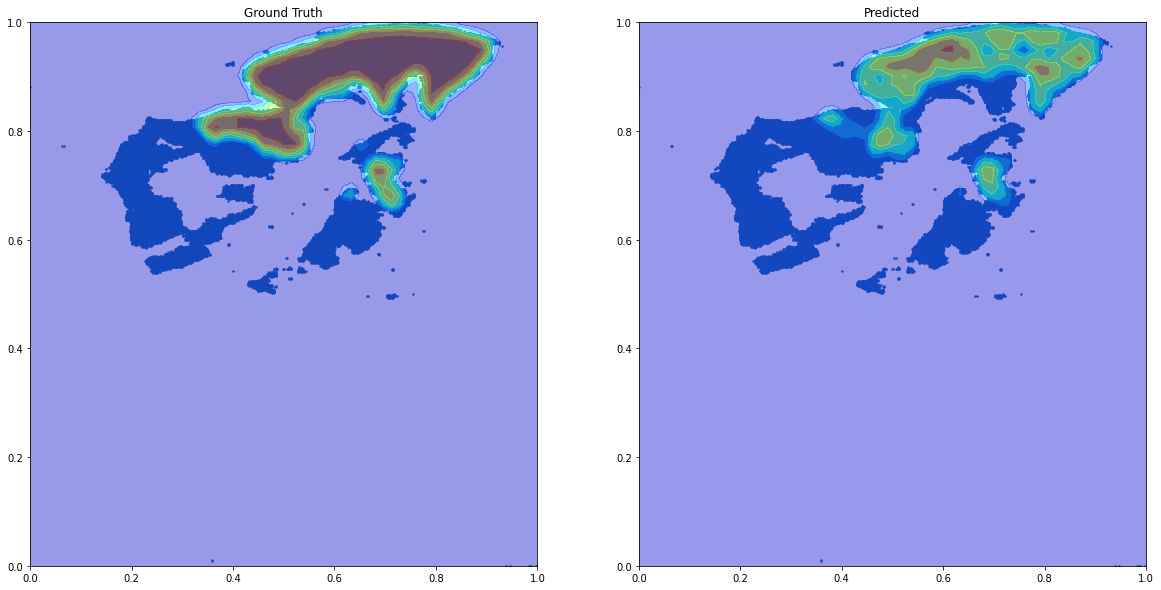

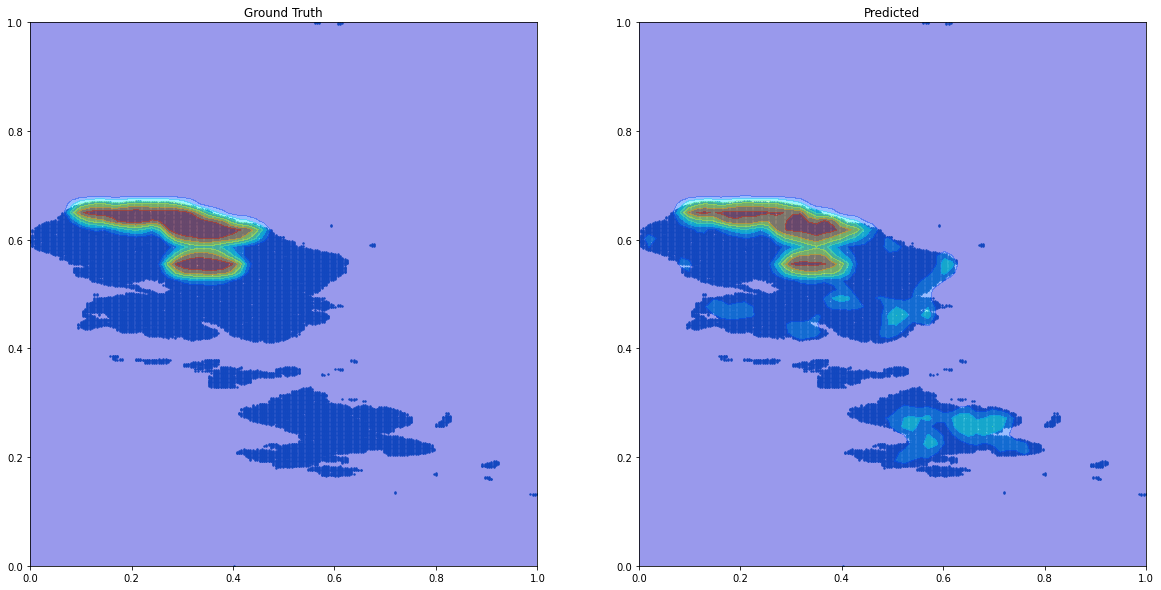

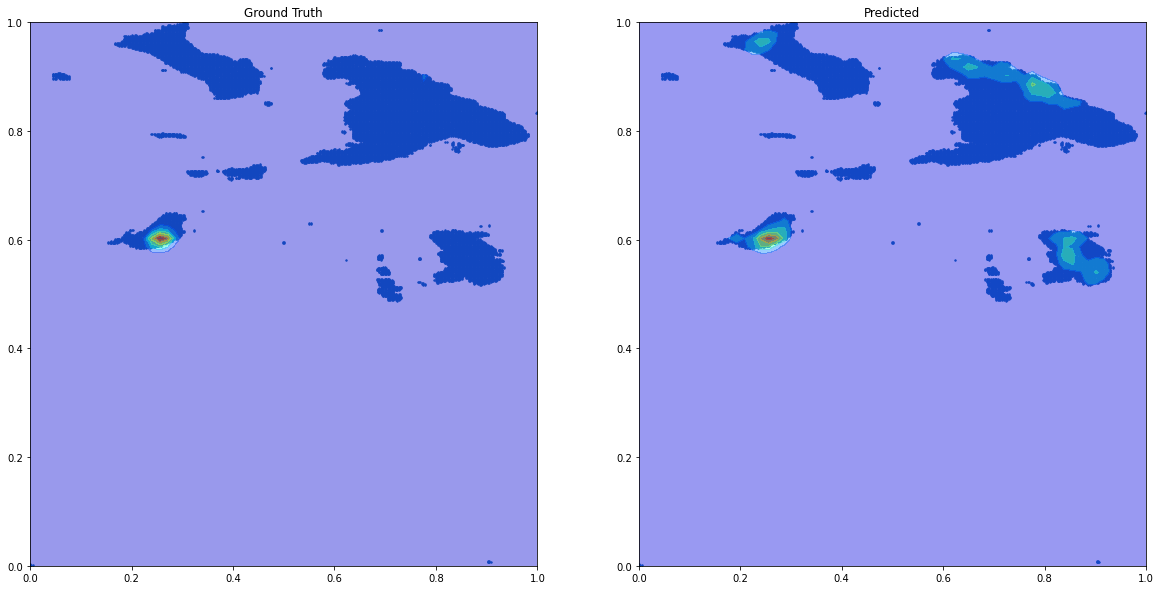

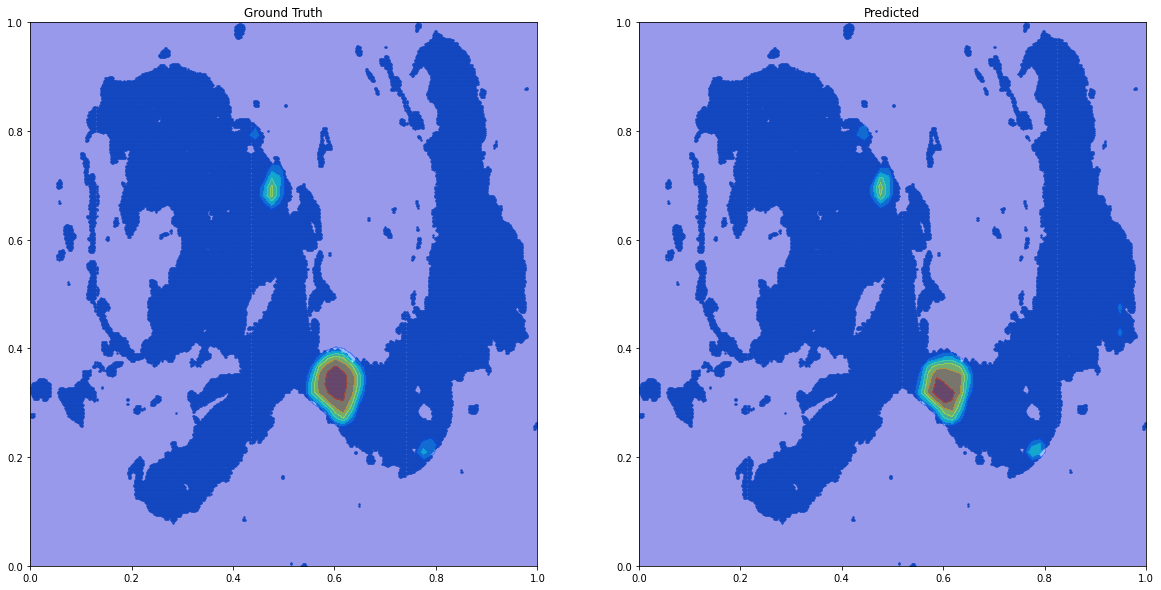

In [133]:
local_labels = []
local_scores = []
coords = []

for img, g, labels, xy in validation_dataloader:
    scores = model.embedding(img).view(-1).detach().cpu().numpy()
    local_scores.append(scores)
    local_labels.append(labels.view(-1).numpy())
    coords.append(xy)
    
    
    if g == 1:
#         plt.figure(figsize=(20,10))
#         plt.hist(scores, bins=100, density=True)
#         plt.yscale("log")
#         plt.show()
        plotMap(labels.view(-1).numpy(), scores<-0., xy[0].cpu().numpy())

# local_labels, local_scores = np.array(local_labels), np.array(local_scores)

In [142]:
(local_labels_sorted[:bin_step].sum() != 0)*1

0

In [159]:
binned_colors

['red',
 'red',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray',
 'gray']